In [ ]:
import os
import zipfile
from tkinter import Tk, filedialog

# ✅ File dialog se zip file upload karwa lo
Tk().withdraw()  # Tk window hide karne ke liye
zip_file_path = filedialog.askopenfilename(title="Select your ZIP file", filetypes=[("ZIP files", "*.zip")])

# ✅ Extract folder bana lo same location pe
extract_path = os.path.splitext(zip_file_path)[0] + "_extracted"

# ✅ Extract the ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# ✅ Andar andar jaake actual folder tak pahucho
while True:
    folders = os.listdir(extract_path)
    if len(folders) == 1 and os.path.isdir(os.path.join(extract_path, folders[0])):
        extract_path = os.path.join(extract_path, folders[0])
    else:
        break

# ✅ Final path confirm
print("✅ Final dataset path:", extract_path)
print("📂 Class folders inside:", os.listdir(extract_path))


TclError: no display name and no $DISPLAY environment variable

In [ ]:
from google.colab import files
import zipfile
import os

# ✅ Upload karo
uploaded = files.upload()

# ✅ File name lo
zip_file_name = list(uploaded.keys())[0]

# ✅ Extract karo
extract_path = "extracted_data"
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# ✅ andar andar dataset1/dataset1 tak jao
while True:
    items = os.listdir(extract_path)
    if len(items) == 1 and os.path.isdir(os.path.join(extract_path, items[0])):
        extract_path = os.path.join(extract_path, items[0])
    else:
        break

print("✅ Final dataset path:", extract_path)
print("📂 Class folders:", os.listdir(extract_path))


Saving dataset1.zip to dataset1.zip
✅ Final dataset path: extracted_data/dataset1
📂 Class folders: ['cardboard', 'glass', 'plastic', 'trash', 'metal', 'paper']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

# Image augment + split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    extract_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    extract_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')  # 6 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.2913 - loss: 2.3493 - val_accuracy: 0.4632 - val_loss: 1.2957
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.5115 - loss: 1.2355 - val_accuracy: 0.5408 - val_loss: 1.1841
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 219s 3s/step - accuracy: 0.6091 - loss: 1.0021 - val_accuracy: 0.6143 - val_loss: 1.0897
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.7030 - loss: 0.8064 - val_accuracy: 0.6262 - val_loss: 1.0546
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.7825 - loss: 0.6151 - val_accuracy: 0.6501 - val_loss: 1.1709
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.8459 - loss: 0.4402 - val_accuracy: 0.6402 - val_loss: 1.3427
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.9205 - loss: 0.2447 - val_accuracy: 0.6183 - val_loss: 1.5530
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 220s 3s/step - accuracy: 0.9455 - loss: 0.1794 - val_accuracy: 0.6183 - v

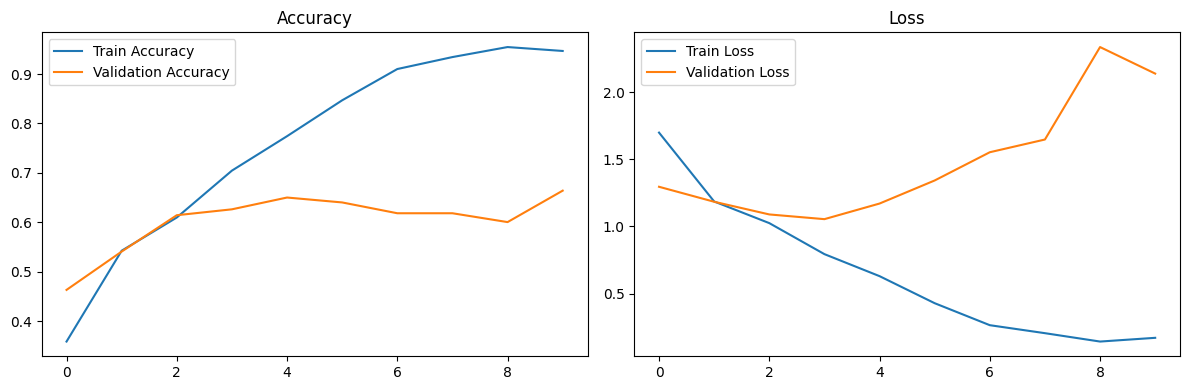

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.save("garbage_classifier_model.h5")
print("✅ Model saved as garbage_classifier_model.h5")


✅ Model saved as garbage_classifier_model.h5


In [11]:
files.download("garbage_classifier_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>